# What is regression ?

Mathematically speaking, according to Wikipedia:
>In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the outcome or response variable, or a label in machine learning parlance) and one or more error-free independent variables (often called regressors, predictors, covariates, explanatory variables or features).

In machine learning regression refers to a supervised learning technique where the goal is to predict a continuous numerical value based on one or more independent features.

# What is linear regression ?

Mathematically speaking, according to Wikipedia:
>In statistics, linear regression is a model that estimates the relationship between a scalar response (dependent variable) and one or more explanatory variables (regressor or independent variable) using linear predictor functions whose unknown model parameters are estimated from the data.

In machine learning linear regression is a specific type of regression model that predicts the output as a linear function of the input features.

More specifically, in linear regression, given an input features vector $x=\begin{pmatrix} x_{0}=1 & x_{1} & x_{2} & ... & x_{n} \end{pmatrix}$, and a vector of weights $\theta=\begin{pmatrix} \theta_{0} & \theta_{1} & \theta_{2} & ... & \theta_{n} \end{pmatrix}$ the model predicts the output according to the following hypothesis function:


$$
h_\theta(x) = \theta_{0}\underbrace{x_{0}}_{=1} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}
$$

$$
h_\theta(x) = \theta^{T}x
$$
  
<br><br>
$\theta_{0}$ is called the bias of the model. It allows the model to shift the regression line predicted up or down so it can better fit the data. 

Without it, the output for $x=\begin{pmatrix} 0 & 0 & ... & 0 \end{pmatrix}$ would always be 0.


# Let's see an example

To get a better understanding of simple linear regression (one input feature, one output value), we will use a simple dataset found on Kaggle (https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression/data). This dataset is called "Salary Dataset" and contains entries with two columns: years of experience and salary. It provides of examples the salaries of various employees according to their experience (measured in years).

### Setup

In [29]:
# Install dependencies as needed:
%pip install kagglehub
%pip install matplotlib
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [30]:
#Import dependencies

import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import numpy as np

In [24]:
%matplotlib inline

### Load the dataset from Kaggle

In [80]:
# Set the path to the file you'd like to load
file_path = "Salary_dataset.csv"

# Load the latest version
salaries_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "abhishek14398/salary-dataset-simple-linear-regression",
  file_path
)

#Remove first column because it is useless
salaries_df = salaries_df.drop('Unnamed: 0', axis=1)

C:\Users\Arthur\AppData\Local\Temp\ipykernel_48608\3023648099.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  salaries_df = kagglehub.load_dataset(


       Unnamed: 0  YearsExperience         Salary
count   30.000000        30.000000      30.000000
mean    14.500000         5.413333   76004.000000
std      8.803408         2.837888   27414.429785
min      0.000000         1.200000   37732.000000
25%      7.250000         3.300000   56721.750000
50%     14.500000         4.800000   65238.000000
75%     21.750000         7.800000  100545.750000
max     29.000000        10.600000  122392.000000


### Observing the data

In [81]:
salaries_df.info()
print(salaries_df.describe())
print("First 5 records:", salaries_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.413333   76004.000000
std           2.837888   27414.429785
min           1.200000   37732.000000
25%           3.300000   56721.750000
50%           4.800000   65238.000000
75%           7.800000  100545.750000
max          10.600000  122392.000000
First 5 records:    YearsExperience   Salary
0              1.2  39344.0
1              1.4  46206.0
2              1.6  37732.0
3              2.1  43526.0
4              2.3  39892.0


Text(0, 0.5, 'Salary')

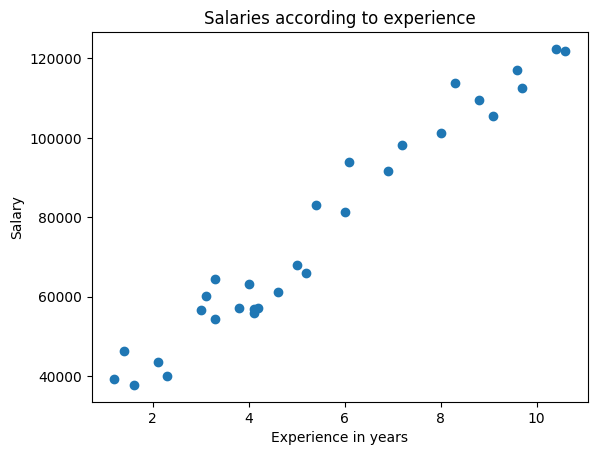

In [66]:
# Plotting the histogram
fig, ax = plt.subplots()
ax.plot(salaries_df['YearsExperience'], salaries_df['Salary'], 'o')

ax.set_title('Salaries according to experience')
ax.set_xlabel('Experience in years')
ax.set_ylabel('Salary')

### Interpreting the graph

As we can see, the points we plotted seem to form a straight line that cuts the y-axis approximately around 37000. This fact indicates that we could use a linear function of the input to predict the output. This is a typical use case of simple linear regression.

To get a better intuition of this, let's plot a straight line that could fit best our data (a straight line that passes close to most of our data points).

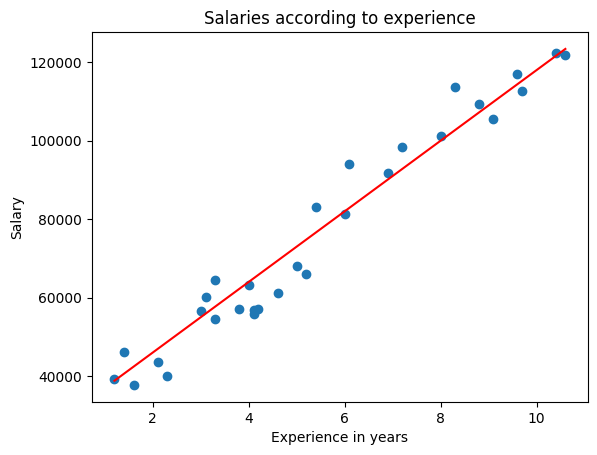

In [67]:
# Define the affine function: y = ax + b
a = 9000  # slope
b = 28000  # y-intercept

# Create x values (from -10 to 10)
x = salaries_df['YearsExperience']

# Calculate y values
y = a * x + b

# Plot
ax.plot(x, y, label=f'y = {a}x + {b}', color='red')
fig

As you can see, this straight line, defined as an affine function, can fit our data pretty good. This is the idea behind linear regression. We want to find the linear function of the input (in this case, a simple affine function) that best fits our data. Once we found it using training, we will be able to use this function as our hypothesis function to predict output for unseen data.

So when we use linear regression, we suppose that the label in our labeled data can be modeled as a linear function of the inputs.

Now let's talk about how we can train our model to find the hypothesis function that best fits our data.

As we saw earlier our hypothesis function is parameterized using parameters from the $\theta$ vector.
These parameters allow us to modify the hypothesis function and fit it to our data.

Before we can even think about fitting our model, we're gonna need a way to measure how good our hypothesis function fits the data. This is done using a loss function. A loss function measures how much our hypothesis function is wrong in its predictions compared to the actual data. For linear regression, the loss function is the Mean Squared Error (MSE) of the hypothesis function. For each training example, we will calculate the error of the model's prediction (the difference between the expected output and the prediction), we will square the error, and finally we will sum the squared errors and divide the result by the total number of training examples.

More formally, according to Wikipedia the MSE is defined as follow:
>In statistics, the mean squared error (MSE)
> or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the true value.

Given the vector of expected outputs $y$ as well as the vector of predicted values $\hat{y}$, the MSE will be computed according to the following formula:

$$
\mathcal{L}(\theta) = \frac{1}{m}\sum_{i=1}^{m} (y_{i}-\hat{y}_{i})^{2}
$$

where m is the number of training examples.

So when we express the predicted values as the result of the hypothesis function:

$$
\mathcal{L}(\theta) = \frac{1}{m}\sum_{i=1}^{m} (y_{i}-h_{\theta}(x^{(i)}))^{2}
$$

where $x^{(i)}$ is the i-th training example.

Why do we use the MSE as our loss function for linear regression?

1) it directly measures what we care about: minimizing MSE, we're trying to make predictions as close as possible to the actual data — which is the goal of regression

2) it makes the result positive so we avoid positive and negative errors canceling each other

3) the bigger the error, the heavier the impact it has on the loss function

4) it has nice mathematical properties:
    - it is differentiable everywhere (important for gradient descent)
    - it is convex in the case of linear regression, it has one global minimum so optimization is straightforward and reliable



Once we have our loss function, our goal will be to minimize the loss. To do that, we will use a method called gradient descent. 

Gradient Descent is an algorithm to find the minimum of a function.
You can think of it like:
> You're on a hilly surface (the loss function), and you want to go downhill to the lowest point (the minimum loss). Gradient descent tells you which direction is downhill and how far to go.

We start with some initial guess for the parameters (e.g., weights in linear regression), then iteratively update them using:

$$
\theta \leftarrow \theta - \eta \nabla_\theta \mathcal{L}(\theta)
$$

- $\theta$: current parameters (e.g. weights, bias)
- $\eta$: learning rate (step size)
- $\nabla_\theta \mathcal{L}(\theta)$: the gradient of the loss function with respect to $\theta$


Why does this work?

Because of a beautiful fact from calculus:

> The gradient of a function at a point points in the direction of steepest increase.  
> So the negative gradient points in the direction of steepest decrease — the fastest way downhill.

So at every step, gradient descent moves in the direction that most quickly reduces the loss.

Let's compute the gradient vector of our loss function. To do that we need to compute the partial derivative for each parameter $\theta_{i}$.

$$
\frac{\partial \mathcal{L}}{\partial \theta_{j}} = \frac{2}{m}\sum_{i=1}^{m} (y_{i}-h_{\theta}(x^{(i)}))x^{(i)}_{j} 
$$


That's it, now that we have all this theory sorted out, we can implement linear regression. All we have to do is start with some parameters, performs gradient descent using the formula for the gradient we have, and once we reach a point where the loss function barely changes we can decide to stop because we arrived close enought to the global minimum.

Let's implement that!

### Vectorization

$$
\underbrace{\hat{y}}_{n \times 1} = \underbrace{X}_{m \times n}\cdot\underbrace{\theta}_{1 \times n}
$$

In [98]:
m = salaries_df.shape[0]

#Create the input features matrix and add the x0 column on the left
X = salaries_df.iloc[:, :-1] 
X.insert(loc=0, column='x0', value=np.ones(m))
y = salaries_df.iloc[:, -1]

n = X.shape[1]

theta = np.random.uniform(0, 50000, size=n)

def compute_loss_and_gradient(X, theta, y):
    y_predicted = X @ theta
    errors = y - y_predicted
    loss = (1/(2*m))*(errors.T@errors)
    gradient = (1/m)*(X.T@errors)
    return loss, gradient

threshold = 0.1
max_epochs = 10
learning_rate = 0.1
last_loss = None
for i in range(max_epochs):
    print("epoch", i)
    current_loss, gradient = compute_loss_and_gradient(X, theta, y)
    print("current_loss", current_loss, "gradient", gradient, "theta", theta)
    if(last_loss and last_loss-current_loss > 0 and last_loss-current_loss < threshold):
        break
    last_loss = current_loss
    theta = theta - learning_rate*gradient

epoch 0
current_loss 16370630223.325739 gradient x0                -1.600164e+05
YearsExperience   -1.101406e+06
dtype: float64 theta [21331.88790696 39659.21688781]
epoch 1
current_loss 374873860123.6712 gradient x0                -7.722459e+05
YearsExperience   -5.273070e+06
dtype: float64 theta x0                  37333.532773
YearsExperience    149799.829031
dtype: float64
epoch 2
current_loss 8594850344908.458 gradient x0                -3.703959e+06
YearsExperience   -2.524858e+07
dtype: float64 theta x0                 114558.126832
YearsExperience    677106.852657
dtype: float64
epoch 3
current_loss 197067514210739.6 gradient x0                -1.774225e+07
YearsExperience   -1.208990e+08
dtype: float64 theta x0                 4.849540e+05
YearsExperience    3.201965e+06
dtype: float64
epoch 4
current_loss 4518484512547149.0 gradient x0                -8.496311e+07
YearsExperience   -5.789096e+08
dtype: float64 theta x0                 2.259179e+06
YearsExperience    1.529186e